# Python-igraph Example
## 1. Creating a graph

In [1]:
from igraph import *

# Create graph
g = Graph(directed=True)

# Add 5 vertices
g.add_vertices(5)

# Add ids and labels to vertices
for i in range(len(g.vs)):
    g.vs[i]["id"]= i
    g.vs[i]["label"]= str(i)

# Add edges
g.add_edges([(0,2),(0,1),(0,3),(1,2),(1,3),(2,4),(3,4)])

# Add weights and edge labels
weights = [8,6,3,5,6,4,9]
g.es['weight'] = weights
g.es['label'] = weights

## 2. Visualising the graph

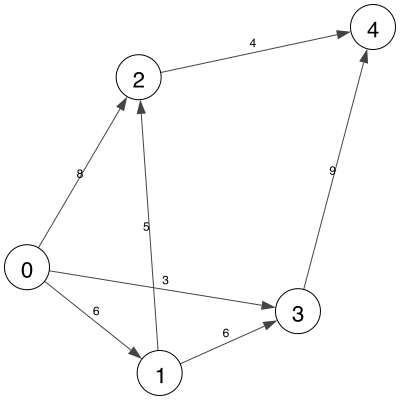

In [2]:
visual_style = {}

out_name = "graph.png"

# Set bbox and margin
visual_style["bbox"] = (400,400)
visual_style["margin"] = 27

# Set vertex colours
visual_style["vertex_color"] = 'white'

# Set vertex size
visual_style["vertex_size"] = 45

# Set vertex lable size
visual_style["vertex_label_size"] = 22

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_lgl()
visual_style["layout"] = my_layout

# Plot the graph
plot(g, out_name, **visual_style)

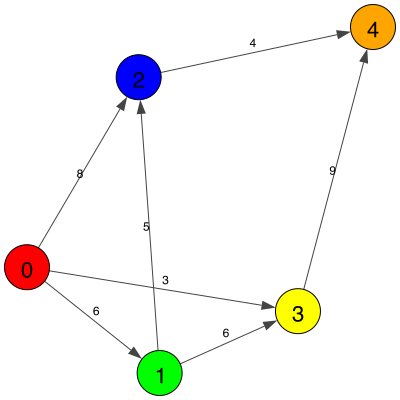

In [3]:
visual_style = {}

out_name = "graph_coloured.png"

# Set bbox and margin
visual_style["bbox"] = (400,400)
visual_style["margin"] = 27

# Set vertex colours
g.vs["color"] = ["red", "green", "blue", "yellow", "orange"]

# Set vertex size
visual_style["vertex_size"] = 45

# Set vertex lable size
visual_style["vertex_label_size"] = 22

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
visual_style["layout"] = my_layout

# Plot the graph
plot(g, out_name, **visual_style)

## 3. Obtaining information on vertices and edges of the graph

In [4]:
print("Number of vertices in the graph:", g.vcount())
print("Number of edges in the graph", g.ecount())
print("Is the graph directed:", g.is_directed())
print("Maximum degree in the graph:", g.maxdegree())
print("Adjacency matrix:\n", g.get_adjacency())

Number of vertices in the graph: 5
Number of edges in the graph 7
Is the graph directed: True
Maximum degree in the graph: 3
Adjacency matrix:
 [[0, 1, 1, 1, 0]
 [0, 0, 1, 1, 0]
 [0, 0, 0, 0, 1]
 [0, 0, 0, 0, 1]
 [0, 0, 0, 0, 0]]


## 4. Obtaining adjacent vertices to a vertex

In [5]:
print(g.neighbors.__doc__)

print(g.neighbors(0, mode=ALL))

neighbors(vertex, mode=ALL)

Returns adjacent vertices to a given vertex.

@param vertex: a vertex ID
@param mode: whether to return only successors (L{OUT}),
  predecessors (L{IN}) or both (L{ALL}). Ignored for undirected
  graphs.
[1, 2, 3]


## 5. Breadth-first search (BFS) from a vertex

In [6]:
print(g.bfs.__doc__)
print(g.bfs(0))

bfs(vid, mode=OUT)

Conducts a breadth first search (BFS) on the graph.

@param vid: the root vertex ID
@param mode: either L{IN} or L{OUT} or L{ALL}, ignored
  for undirected graphs.
@return: a tuple with the following items:
   - The vertex IDs visited (in order)
   - The start indices of the layers in the vertex list
   - The parent of every vertex in the BFS

([0, 1, 2, 3, 4], [0, 1, 4, 5], [0, 0, 0, 0, 2])


## 6. Determining shortest paths from a vertex

In [7]:
print(g.get_shortest_paths.__doc__)

print("The shortest paths from vertex 0:", g.get_shortest_paths(0))
print("The shortest paths from vertex 0 to vertex 4:", g.get_shortest_paths(0, to=4))

get_shortest_paths(v, to=None, weights=None, mode=OUT, output="vpath")

Calculates the shortest paths from/to a given node in a graph.

@param v: the source/destination for the calculated paths
@param to: a vertex selector describing the destination/source for
  the calculated paths. This can be a single vertex ID, a list of
  vertex IDs, a single vertex name, a list of vertex names or a
  L{VertexSeq} object. C{None} means all the vertices.
@param weights: edge weights in a list or the name of an edge attribute
  holding edge weights. If C{None}, all edges are assumed to have
  equal weight.
@param mode: the directionality of the paths. L{IN} means to
  calculate incoming paths, L{OUT} means to calculate outgoing
  paths, L{ALL} means to calculate both ones.
@param output: determines what should be returned. If this is
  C{"vpath"}, a list of vertex IDs will be returned, one path
  for each target vertex. For unconnected graphs, some of the list
  elements may be empty. Note that in c

In [16]:
shortest_path = g.get_shortest_paths(0, to=4)[0]

path_weight = 0

for i in range(1,len(shortest_path)):
    weight = g.es.select(_source=shortest_path[i-1], _target=shortest_path[i])['weight'][0]
    path_weight += weight

print(path_weight)

[0, 2, 4]
0 2, 8
2 4, 4
12


## 7. Obtain the Laplacian matrix of a graph

In [9]:
print(g.laplacian.__doc__)
print("Laplacian matrix of a graph:\n",g.laplacian())

laplacian(weights=None, normalized=False)

Returns the Laplacian matrix of a graph.

The Laplacian matrix is similar to the adjacency matrix, but the edges
are denoted with -1 and the diagonal contains the node degrees.

Normalized Laplacian matrices have 1 or 0 in their diagonals (0 for vertices
with no edges), edges are denoted by 1 / sqrt(d_i * d_j) where d_i is the
degree of node i.

Multiple edges and self-loops are silently ignored. Although it is
possible to calculate the Laplacian matrix of a directed graph, it does
not make much sense.

@param weights: edge weights to be used. Can be a sequence or iterable or
  even an edge attribute name. When edge weights are used, the degree
  of a node is considered to be the weight of its incident edges.
@param normalized: whether to return the normalized Laplacian matrix.
@return: the Laplacian matrix.

Laplacian matrix of a graph:
 [[3, -1, -1, -1, 0], [0, 2, -1, -1, 0], [0, 0, 1, 0, -1], [0, 0, 0, 1, -1], [0, 0, 0, 0, 0]]


## 8. Determine the maximum flow between the source and target vertices

In [10]:
print(g.maxflow.__doc__)
print(g.maxflow(0,4,weights).__doc__)

maxflow = g.maxflow(0,4,weights)

print("The maximum flow value:", maxflow.value)
print("The flow values on each edge:", maxflow.flow)
print("Tedge IDs in the minimal cut of the flow:", maxflow.cut)
print("The vertex IDs in the parts created created by the cut:", maxflow.partition)

maxflow(source, target, capacity=None)

        Returns a maximum flow between the given source and target vertices
        in a graph.

        A maximum flow from I{source} to I{target} is an assignment of
        non-negative real numbers to the edges of the graph, satisfying
        two properties:

            1. For each edge, the flow (i.e. the assigned number) is not
               more than the capacity of the edge (see the I{capacity}
               argument)

            2. For every vertex except the source and the target, the
               incoming flow is the same as the outgoing flow.

        The value of the flow is the incoming flow of the target or the
        outgoing flow of the source (which are equal). The maximum flow
        is the maximum possible such value.

        @param capacity: the edge capacities (weights). If C{None}, all
          edges have equal weight. May also be an attribute name.
        @return: a L{Flow} object describing the maximum flow
  